# Numerics for partial differential equations 2

# TP2: systems of hyperbolic conservation laws


## Exercise 1: Linear system of conservation laws

We consider the linear system of conservation laws given by

$$
\partial_t U + A \partial_x U = 0, \quad A = \begin{pmatrix} 1 & 0 & -1 \\
                                                             0 & 2 & 1 \\
															 0 & 1 & 0 \end{pmatrix}
$$

and $U \in \mathbb{R}^3$ on $\Omega \times (0, T)$, with $\Omega = [-1, 1]$.


In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

#### (a)

To prove that this linear system of conservation laws is hyperbolic, we can show that $A$ is diagonalizable and that $Sp(A) \subset \mathbb{R}$.  
Let's compute the eigenvalues of $A$, we start by computing $\chi_A(\lambda) = \text{det}(A - \lambda I)$: \\

$$
\begin{align*}
\chi_A(\lambda) = & \text{det}\begin{pmatrix} 1 - \lambda & 0 & -1 \\
											0 & 2 - \lambda & 1 \\
											0 & 1 & -\lambda \end{pmatrix} \\
& = (1 - \lambda)(2 - \lambda)(-\lambda) - (1 - \lambda) \quad \text{,(Sarrus)} \\
& = (1 - \lambda)(\lambda^2 - 2\lambda - 1) \\
\end{align*}
$$

So $1$ is an eigenvalue of $A$.

$$
\begin{align*}
\Delta = & 4 + 4 = 8 \\
\lambda_2 = & \frac{2 + \sqrt{8}}{2} = \frac{2 + 2\sqrt{2}}{2} = 1 + \sqrt{2} \\
\lambda_3 = & 1 - \sqrt{2} \\
\end{align*}
$$

$Sp(A) = \{1 - \sqrt{2},1 , 1 + \sqrt{2}\} \subset \mathbb{R}$.


In [2]:
A = sp.Matrix([[1, 0, -1], [0, 2, 1], [0, 1, 0]])

eigvals = A.eigenvals()  # Dictionary: {eigenvalue: multiplicity}
eigvecs = A.eigenvects()  # List: (eigenvalue, multiplicity, [eigenvectors])

print("Eigenvalues :")
for val, mult in eigvals.items():
    print(f"{sp.pretty(val)} (multiplicity {mult})")

print("\nEigenvectors :")
for val, mult, vecs in eigvecs:
    print(f"Eigenvalue: {sp.pretty(val)}")
    for vec in vecs:
        print(f"{sp.pretty(vec)}")

Eigenvalues :
1 - √2 (multiplicity 1)
1 + √2 (multiplicity 1)
1 (multiplicity 1)

Eigenvectors :
Eigenvalue: 1
⎡1⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦
Eigenvalue: 1 - √2
⎡  √2  ⎤
⎢  ──  ⎥
⎢  2   ⎥
⎢      ⎥
⎢1 - √2⎥
⎢      ⎥
⎣  1   ⎦
Eigenvalue: 1 + √2
⎡ -√2  ⎤
⎢ ──── ⎥
⎢  2   ⎥
⎢      ⎥
⎢1 + √2⎥
⎢      ⎥
⎣  1   ⎦


The eigenvalues of $A$ are distinct and the eigenvectors exist and are linearly independant (they form a basis of $\mathbb{R}^3$).   
Thus, $A$ is diagonalizable.  
Plus the eigenvalues are real.  
Thus, the system is hyperbolic.

The characteristic speeds of the system are given by $Sp(A) = \{1 - \sqrt{2},1, 1 + \sqrt{2}\}$ and the characteristic fields are given by the eigenvectors,

$$
r_1 = \begin{pmatrix}  \frac{\sqrt{2}}{2} \\ 1 - \sqrt{2} \\ 1 \end{pmatrix}, \quad r_2 = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}, \quad r_3 = \begin{pmatrix} -\frac{\sqrt{2}}{2} \\ 1 + \sqrt{2} \\ 1 \end{pmatrix}
$$

According to Remark 2.11, since the system is linear, $\nabla f(U)$ is independent of $U$ thus all fields are linear-degenerate so we will have contact waves.


#### (b)

Let $R = (r_1, r_2, r_3)$  
The characteristic variables are defined by $V = R^{-1}U$.  
We have $R = \begin{pmatrix}
		\frac{\sqrt{2}}{2} & 1 & -\frac{\sqrt{2}}{2} \\
		1 - \sqrt{2} & 0 & 1 + \sqrt{2} \\
		1 & 0 & 1
		\end{pmatrix}
$


In [3]:
# Define the symbols
sqrt2 = sp.sqrt(2)

R = sp.Matrix([[sqrt2 / 2, 1, -sqrt2 / 2], [1 - sqrt2, 0, 1 + sqrt2], [1, 0, 1]])

R

Matrix([
[  sqrt(2)/2, 1,  -sqrt(2)/2],
[1 - sqrt(2), 0, 1 + sqrt(2)],
[          1, 0,           1]])

In [4]:
R_inv = R.inv()

R_inv

Matrix([
[0, (-1 + sqrt(2))/(-4 + 2*sqrt(2)), 1/(4 - 2*sqrt(2))],
[1,                             1/2,              -1/2],
[0,                       sqrt(2)/4,   1/2 - sqrt(2)/4]])

$$
R^{-1} = \begin{pmatrix}
		0 & \frac{-1+\sqrt{2}}{-4 + 2\sqrt{2}} & \frac{1}{4-2\sqrt{2}}\\
		1 & \frac{1}{2} & \frac{-1}{2} \\
		0 & \frac{\sqrt{2}}{4} & -\frac{1}{2} - \frac{\sqrt{2}}{4} \\
		\end{pmatrix}
$$

$$
V = \begin{pmatrix}v_1 \\ v_2 \\ v_3 \end{pmatrix} = R^{-1}U = \begin{pmatrix}
		0 & \frac{-1+\sqrt{2}}{-4 + 2\sqrt{2}} & \frac{1}{4-2\sqrt{2}}\\
		1 & \frac{1}{2} & \frac{-1}{2} \\
		0 & \frac{\sqrt{2}}{4} & -\frac{1}{2} - \frac{\sqrt{2}}{4} \\
		\end{pmatrix} \begin{pmatrix}
		U_1 \\
		U_2 \\
		U_3
		\end{pmatrix}
$$

Thus, the characteristic variables are given by:

$$
\begin{align*}
v_1 = & \frac{-1+\sqrt{2}}{-4 + 2\sqrt{2}}U_2 + \frac{1}{4-2\sqrt{2}}U_3 \\
v_2 = & U_1 + \frac{1}{2}U_2 - \frac{1}{2}U_3 \\
v_3 = & \frac{\sqrt{2}}{4}U_2 - \frac{1}{2}U_3 - \frac{\sqrt{2}}{4}U_3
\end{align*}
$$

As said previously, since the system is linear we wont have any shock or rarefaction waves from a smooth initial condition.  
But from a discontinuous initial condition it can still produce discontinuities that will move at constant characteristic speeds.


#### (c)

FOr each component $v_i$ of $V$ we have:

$$
\begin{cases}
\partial_t v_i + \lambda_i \partial_x v_i = 0, \quad i = 1, 2, 3 \\
v_i(x, 0) = R^{-1}U_{0,i}(x) = v_{0,i}(x)
\end{cases}
$$

Since we know that $U = RV$, we obtain:

$$
\begin{align*}
U(x,t ) &= \sum_{i=1}^3 v_i(x,t)r_i \\
&= \sum_{i=1}^3 v_{0,i}(x - \lambda_i t)r_i
\end{align*}
$$


In [5]:
# Characteristic speeds
lambda_1 = 1 - np.sqrt(2)
lambda_2 = 1
lambda_3 = 1 + np.sqrt(2)

# Initial conditions
uL = np.array([1.0, 0.0, 1.0])
uR = np.array([0.5, 0.0, 0.1])

# Characteristic variables
vL = R_inv @ uL
vR = R_inv @ uR


def initial_condition(x):
    """Return the initial conditions at a given point x."""
    if x < 0:
        return uL
    else:
        return uR


def exact_solution(x, T):
    """Return the exact solution of the Riemann problem."""
    xi = x / T
    u_ex = np.zeros((len(x), 3))
    for i in range(len(x)):
        if xi[i] < lambda_1:
            v = vL
        elif lambda_1 <= xi[i] < lambda_2:
            v = np.copy(vL)
            v[0] = vR[0]
        elif lambda_2 <= xi[i] <= lambda_3:
            v = np.copy(vL)
            v[0] = vR[0]
            v[1] = vR[1]
        else:
            v = vR
        u_ex[i, :] = R @ v
    return u_ex

In [6]:
# (d)
A = np.array([[1.0, 0, -1], [0, 2, 1], [0, 1, 0]])


def f(U):
    """Compute the flux function f(U) = A * U."""
    U = np.asarray(U)
    return np.dot(A, U)


def df(U):
    """Compute the Jacobian of the flux function f'(U) = A."""
    return A


def LFF_flux(uL, uR):
    """Compute the Lax-Friedrichs flux at the interface."""
    uL = np.asarray(uL)
    uR = np.asarray(uR)

    lamb = np.max(np.abs(np.linalg.eigvals(A)))
    return 0.5 * (f(uL) + f(uR)) - 0.5 * lamb * (uR - uL)


def LLF_scheme(U, dx, dt, nt):
    """Compute the solution of the 1D linear advection equation using the LLF scheme."""
    N = len(U)  # Number of grid points

    # Time-stepping loop
    for _ in range(nt):
        U_new = np.zeros_like(U)

        # Loop through each grid point
        for i in range(1, N - 1):
            # Compute the left and right states at the interface (uL and uR)
            uL = U[i]
            uR = U[i + 1]

            # Compute the LLF flux at interfaces
            flux_right = LFF_flux(uL, uR)
            flux_left = LFF_flux(U[i - 1], uL)

            # Update the state
            U_new[i] = U[i] - dt / dx * (flux_right - flux_left)

        # Boundary conditions
        U_new[0] = U_new[1]
        U_new[-1] = U_new[-2]

        # Update the solution
        U = U_new

    return U

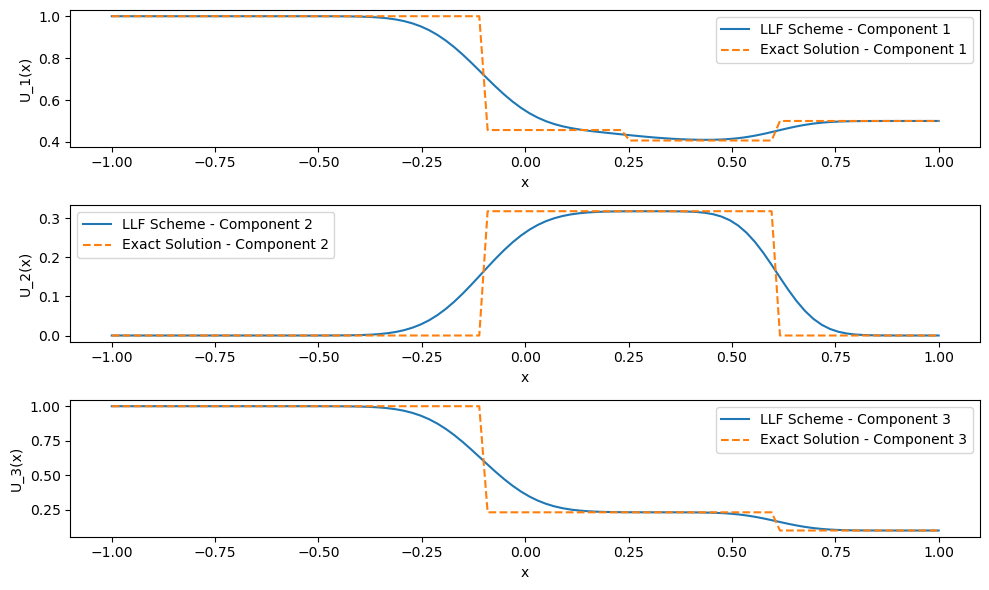

In [7]:
T = 0.25
N = 100
cfl = 0.5
dx = 2 / N
dt = cfl * dx / lambda_3
nt = int(np.ceil(T / dt))
dt = T / nt


x_vals = np.linspace(-1, 1, N)
U_initial = np.array([initial_condition(x) for x in x_vals])
U_ex = exact_solution(x_vals, T)

U = LLF_scheme(U_initial, dx, dt, nt)

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.subplot(3, 1, i + 1)
    plt.plot(x_vals, U[:, i], label=f"LLF Scheme - Component {i+1}")
    plt.plot(
        x_vals, U_ex[:, i], label=f"Exact Solution - Component {i+1}", linestyle="--"
    )
    plt.xlabel("x")
    plt.ylabel(f"U_{i+1}(x)")
    plt.legend()

plt.tight_layout()
plt.show()

## Exercise 2: Riemann solver for the Saint-Venant system

We consider the Saint-Venant system of shallow water equations:

$$
\begin{align*}
\partial_t \begin{pmatrix} h \\ hu \end{pmatrix} + \partial_x \begin{pmatrix} hu \\ hu^2 + \frac{1}{2}gh^2 \end{pmatrix} & = 0 \quad \text{ on} \quad [a,b]\times(0,T) \\
\end{align*}
$$

where $h>0$ is the water height, $u$ is the velocity, and $g=9.81m/s$ is the gravity constant.


In [8]:
g = 9.81


def z(a, b):
    """Compute z depending on the conditions for a and b."""
    if b < a:
        return 2 * np.sqrt(g) / (np.sqrt(a) + np.sqrt(b))
    else:
        return np.sqrt(g / 2.0) * np.sqrt(
            (1 + 1e-5) / (a + 1e-5) + (1 + 1e-5) / (b + 1e-5)
        )


def newton_solver(hL, hR, uL, uR, tol=1e-6, max_iter=100):
    """Solve for the intermediate water height hM using Newton's method."""
    hM = (hL + hR) / 2  # Initial guess for hM

    for _ in range(max_iter):
        # Compute the flux differences
        fL = (
            2 * (np.sqrt(g * hM) - np.sqrt(g * hL))
            if hM > hL
            else (hM - hL) * z(hM, hL)
        )
        fR = (
            2 * (np.sqrt(g * hM) - np.sqrt(g * hR))
            if hM > hR
            else (hM - hR) * z(hM, hR)
        )
        f = uR - uL + fL + fR

        # Compute the derivative for Newton's update
        dfL = g / np.sqrt(g * hM) if hM > hL else z(hM, hL)
        dfR = g / np.sqrt(g * hM) if hM > hR else z(hM, hR)
        df = dfL + dfR

        # Newton update
        hM_new = hM - f / df
        if abs(hM_new - hM) < tol:
            return hM_new
        hM = hM_new

    raise ValueError("Newton solver did not converge")


def RS(uL, uR, hL, hR, xi):
    """Riemann solver for the shallow water equations."""
    # Step 1: Solve for hM using Newton's method
    hM = newton_solver(hL, hR, uL, uR)

    # Step 2: Compute intermediate velocities
    uM = uL - (hM - hL) * z(hM, hL)

    # Step 3: Define wave speeds
    lamb1_ = uL - np.sqrt(g * hL)
    lamb1p = uM - np.sqrt(g * hM)
    lamb2_ = uM + np.sqrt(g * hM)
    lamb2p = uR + np.sqrt(g * hR)

    # # Rankine-Hugoniot conditions
    # sigma = sigma = (uM * hM - uL * hL + 0.5 * g * (hM**2 - hL**2)) / (hM - hL)
    # if hM > hL:
    #     lamb1_ = sigma
    #     lamb1p = sigma
    # elif hM < hL:
    #     # Rarefaction wave
    #     lamb1_ = uL - np.sqrt(g * hL)
    #     lamb1p = uM - np.sqrt(g * hM)
    # # same for lamb2
    # if hM > hR:
    #     lamb2_ = sigma
    #     lamb2p = sigma
    # elif hM < hR:
    #     # Rarefaction wave
    #     lamb2_ = uM + np.sqrt(g * hM)
    #     lamb2p = uR + np.sqrt(g * hR)

    # Step 4: Determine the state based on xi
    if xi < lamb1_:  # Left state
        return hL, uL

    elif lamb1_ <= xi < lamb1p:  # 1-rarefaction
        h = ((uL - xi) / (2 * np.sqrt(g))) ** 2
        u = uL - 2 * np.sqrt(g * hL) + 2 * np.sqrt(g * h)
        return h, u

    elif lamb1p <= xi < lamb2_:  # Middle state (shock or rarefaction)
        return hM, uM

    elif lamb2_ <= xi < lamb2p:  # 2-rarefaction
        h = ((xi - uR) / (2 * np.sqrt(g))) ** 2
        u = uR + 2 * np.sqrt(g * hR) - 2 * np.sqrt(g * h)
        return h, u

    else:  # Right state
        return hR, uR

In [9]:
# Test
# Initial left and right states
hL, uL = 2.0, 0.0  # Left: height and velocity
hR, uR = 1.0, 0.0  # Right: height and velocity

# Position to evaluate
xi = 0.5

h, u = RS(uL, uR, hL, hR, xi)
print(f"Solution at xi={xi}: h={h:.3f}, u={u:.3f}")

Solution at xi=0.5: h=1.459, u=1.303


#### (b)

##### (i) Only shock waves

We want to find all states $U = \begin{pmatrix} h \\ hu \end{pmatrix}$ that can be connected to a state $\tilde{U} = \begin{pmatrix} \tilde{h} \\ \tilde{hu} \end{pmatrix}$ by a shock wave. According to the Definition 2.12, the RH condition needs to hold, i.e. :

$$
[hu] = \sigma[h] \\
[hu^2 + \frac{1}{2}gh^2] = \sigma[h u]
$$

where $\sigma$ is the speed of the shock wave and $[u]= \tilde{U}U$.  
We have 3 unknowns $\sigma, h, u$ and 2 equations so we expect a one-dimensional set of solutions.  
Since $m=2$, we have a 1-wave family an a 2-wave family. We choose $h$ as free parameter.

For $U \neq \tilde{U}$, we have $\sigma = \frac{[hu]}{[h]}$.  
Inserting $\sigma$ in the second equation, we get:

$$
u^2 - 2u\tilde{u} + \left( \tilde{u}^2 + \frac{g}{2} \left( \frac{\tilde{h}}{h} - \frac{h}{\tilde{h}} \right)(\tilde{h} - h) \right) = 0
$$

which has the roots:

$$
u = \tilde{u} \pm \sqrt{\frac{g}{2} \left( \frac{\tilde{h}}{h} - \frac{h}{\tilde{h}} \right)(\tilde{h} - h) }
$$

and

$$
\sigma = \tilde{u} \pm \sqrt{\frac{g}{2} \left( \frac{\tilde{h}+h}{h\tilde{h}}  \right) }
$$

For $h \longrightarrow \tilde{h}$, we have $u \longrightarrow \tilde{u}$ which has to hold since the curve needs to pass through the point $(\tilde{h}, h \tilde{u})$. Moreower $\sigma$ tends to $\tilde{u} \pm \sqrt{g \tilde{h}}$ thus we can't identify the the 1-wave associated with the "-" curve and the 2-wave associated with the "+" curve.

To obtain admissible shock solution, the Lax condition needs to hold.  
For a 1-shock let $\tilde{U} = U_L$ connected to a state $U = U_m$.

We claim that it follows that $h_m > h_L$ must hold for an admissible 1-shock and that $h_m > h_R$ must hold for an admissible 2-shock.

$$
\lambda_1(U_L) = u_L - \sqrt{gh_L} > \sigma > u_R - \sqrt{gh_R} = \lambda_1(U_R)
$$

thus,

$$
u - u_L + \sqrt{g h_L} - \sqrt{g h} < 0
$$

thus,

$$
(h_L - h) \left[ \sqrt{\frac{g}{h} \left( \frac{h + h_L}{hh_L} \right) } +
\sqrt{g} \left( \sqrt{h_L} + \sqrt{h_R} \right)^{-1} \right] < 0
$$

which holds only if $h > h_L$, note that $h=h_m$, thus $h_m > h_L$.

For example we can take:

$$
U_L = \begin{pmatrix} h_L \\ h_L u_L \end{pmatrix} = \begin{pmatrix} 2 \\ 2 \times 1.5 \end{pmatrix}, \quad U_R = \begin{pmatrix} h_R \\ h_R u_R\end{pmatrix} = \begin{pmatrix} 1 \\ 1 \times 0.5 \end{pmatrix}
$$


In [10]:
hL = 2.0
uL = 2.5
hR = 1.5
uR = 0.5

hM = newton_solver(hL, hR, uL, uR)
hM

2.187786895824874

$h_m \approx 2.19  > h_L = 2 > h_R = 1$ ,thus the 1-shock is admissible.


##### (ii) Only rarefaction waves

From Definition 2.14 it needs to hold thta $\lambda_i(U_L) < \lambda_i(U_R)$.  
To connect a state $U_L$ to $\tilde{U} = U_m$ by a 1-rarefaction wave along the 1-integral curve to a state $U_R$ on the 2-integral curve by a 2-rarefaction wave we have the following conditions:

$$
\begin{cases}
u_m = u_L - 2\sqrt{gh_L} - 2\sqrt{gh_m} \\
u_m = u_R + 2\sqrt{gh_R} + 2\sqrt{gh_m}
\end{cases}
$$

We have 2 equations and 2 unknowns, thus we expect a finite number of solutions.

$$
\lambda_1(U_L) < \lambda_1(U_m) \\
\lambda_2(U_m) < \lambda_2(U_R)
$$

From this we can deduce that $h_m < h_L$ and $h_m < h_R$ must hold.

For example we can take:

$$
U_L = \begin{pmatrix} h_L \\ h_L u_L \end{pmatrix} = \begin{pmatrix} 1 \\ 1 \times 0 \end{pmatrix}, \quad U_R = \begin{pmatrix} h_R \\ h_R u_R\end{pmatrix} = \begin{pmatrix} 1.5 \\ 1.5 \times 2 \end{pmatrix}
$$


In [11]:
hL = 1.0
uL = 0
hR = 1.5
uR = 2

hM = newton_solver(hL, hR, uL, uR)
hM

0.9136706620068007

##### (iii) Both shock and rarefaction waves

This time the middle state $U_m=(h_m,u_m)$ must satisfy:

- The rarefaction equations for the 1-wave:

  $$
  u_m=u_L - 2\sqrt{g h_L} + 2\sqrt{g h_m}
  $$

- The RH conditions for the 2-shock:
  $$
  [hu]= \sigma[h] \\
  [hu^2+ \frac{1}{2}​gh^2]= \sigma[hu]
  $$


In [12]:
hL = 1.5
uL = 1.0
hR = 1.0
uR = 0.5

hM = newton_solver(hL, hR, uL, uR)
hM  # hL > hM > hR

1.3278698585408863

In [13]:
# (c)


def flux(U):
    """Compute the flux f(U) for the shallow water equations."""
    h, hu = U
    u = hu / h if h > 0 else 0  # Avoid division by zero
    return np.array([hu, hu * u + 0.5 * g * h**2])


def max_eigenvalue(U):
    """Compute the maximum eigenvalue of the Jacobian of f(U)."""
    h, hu = U
    u = hu / h if h > 0 else 0  # Avoid division by zero
    return max(abs(u - np.sqrt(g * h)), abs(u + np.sqrt(g * h)))


def LFF_flux(U_left, U_right):
    """Compute the Lax-Friedrichs flux at the interface."""
    fL = flux(U_left)
    fR = flux(U_right)
    lambda_max = max(max_eigenvalue(U_left), max_eigenvalue(U_right))
    return 0.5 * (fL + fR) + lambda_max * 0.5 * (U_left - U_right)

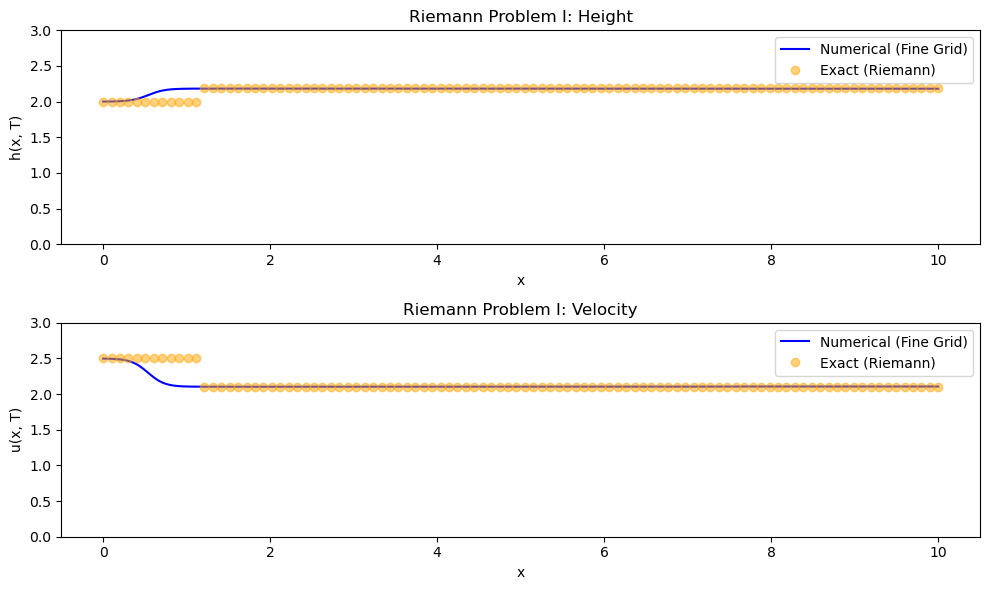

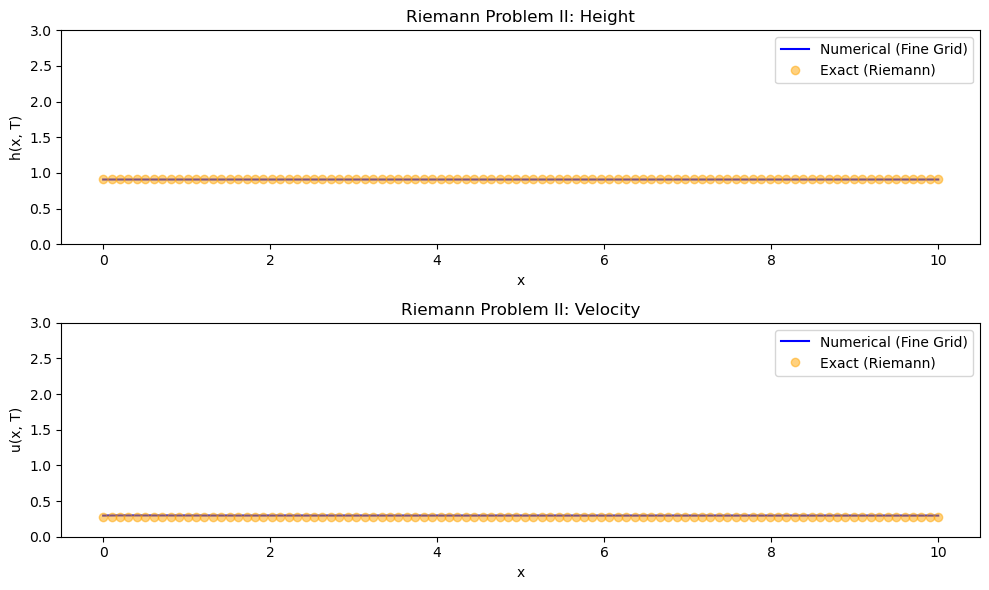

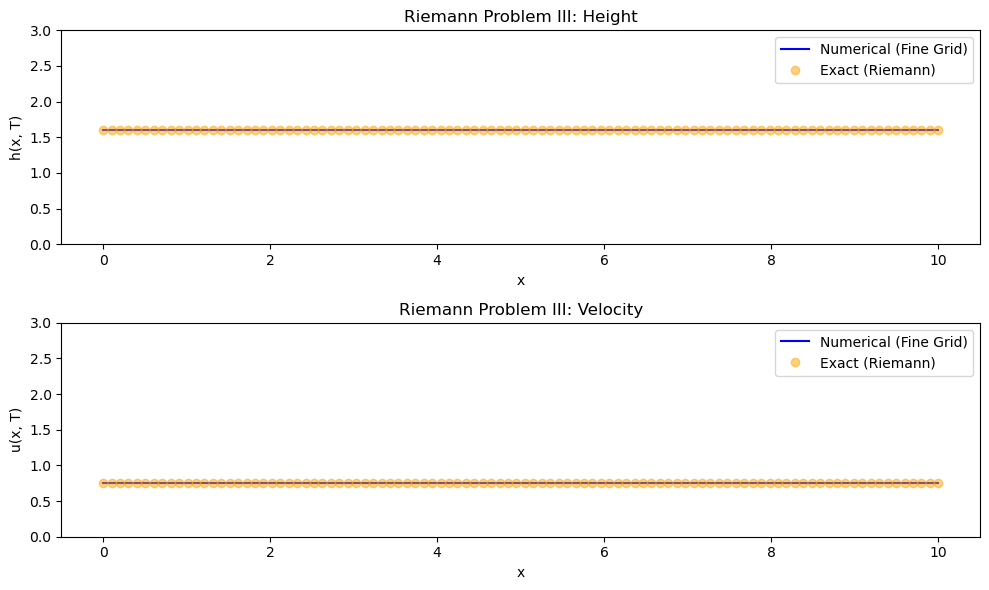

In [14]:
L = 10.0  # Domain length
T = 2.0  # Final time
coarse_grid = 100  # Number of grid points for coarse grid
fine_grid = 1000  # Number of grid points for fine grid

# Initial conditions for Riemann problems
riemann_problems = {
    "i": {"hL": 2.0, "uL": 2.5, "hR": 1.5, "uR": 0.5},
    "ii": {"hL": 1.0, "uL": 0.0, "hR": 1.5, "uR": 2.0},
    "iii": {"hL": 1.5, "uL": 1.0, "hR": 1.5, "uR": 0.5},
}

# Solve each problem
for case, init_cond in riemann_problems.items():
    hL, uL, hR, uR = init_cond["hL"], init_cond["uL"], init_cond["hR"], init_cond["uR"]

    # Fine and coarse grids based on the parameters
    x_fine = np.linspace(0, L, fine_grid)  # Fine grid
    x_coarse = np.linspace(0, L, coarse_grid)  # Coarse grid

    # Fine grid numerical reference solution
    dx_fine = x_fine[1] - x_fine[0]
    dt_fine = 0.5 * dx_fine / np.sqrt(g * max(hL, hR))  # cfl condition
    nt_fine = int(T / dt_fine)

    # Initial state for fine grid
    U_fine = np.zeros((fine_grid, 2))
    U_fine[: fine_grid // 2, 0] = hL  # Height
    U_fine[fine_grid // 2 :, 0] = hR
    U_fine[: fine_grid // 2, 1] = hL * uL  # Momentum
    U_fine[fine_grid // 2 :, 1] = hR * uR

    U_fine = LLF_scheme(U_fine, dx_fine, dt_fine, nt_fine)

    # Coarse grid exact solution
    h_exact = np.zeros(coarse_grid)
    u_exact = np.zeros(coarse_grid)
    for i, xi in enumerate(x_coarse - L / 2):
        h_exact[i], u_exact[i] = RS(uL, uR, hL, hR, xi / T)

    plt.figure(figsize=(10, 6))

    # Plot height
    plt.subplot(2, 1, 1)
    plt.plot(x_fine, U_fine[:, 0], label="Numerical (Fine Grid)", color="blue")
    plt.plot(x_coarse, h_exact, "o", label="Exact (Riemann)", color="orange", alpha=0.5)
    plt.title(f"Riemann Problem {case.upper()}: Height")
    plt.xlabel("x")
    plt.ylabel("h(x, T)")
    plt.ylim(0, 3)
    plt.legend()

    # Plot velocity
    plt.subplot(2, 1, 2)
    plt.plot(
        x_fine,
        np.where(U_fine[:, 0] > 0, U_fine[:, 1] / U_fine[:, 0], 0),
        label="Numerical (Fine Grid)",
        color="blue",
    )
    plt.plot(x_coarse, u_exact, "o", label="Exact (Riemann)", color="orange", alpha=0.5)
    plt.title(f"Riemann Problem {case.upper()}: Velocity")
    plt.xlabel("x")
    plt.ylabel("u(x, T)")
    plt.ylim(0, 3)
    plt.legend()

    plt.tight_layout()
    plt.show()

## Exercise 3: Isentropic Euler equations

We consider the isentropic Euler equations for the simulation of compressible gas flows:

$$
\partial_t \begin{pmatrix} \rho \\ \rho u \end{pmatrix} + \partial_x \begin{pmatrix} \rho u \\ \rho u^2 + \kappa \rho^\gamma  \end{pmatrix} = 0 \quad \text{on} \quad [a,b] \times (0,T)
$$

where:

- $\rho > 0$ is the gaz density,
- $u$ is the velocity,
- $\kappa > 0 $ is a constant,
- $\gamma > 1$ is a constant.


#### (a)

Let $q = \begin{pmatrix} \rho \\ \rho u \end{pmatrix}$, the flux is then given by $f(q) = \begin{pmatrix} \rho u \\ \rho u^2 + \kappa \rho^\gamma \end{pmatrix}$.

Let

- $m = \rho u \rightarrow u = \frac{m}{\rho}$,
- $p = \kappa \rho^\gamma $
- $c = \sqrt{\gamma \kappa \rho^{\gamma - 1}}$
- $q= \begin{pmatrix} \rho \\ m \end{pmatrix}$

Thus, the flux can be written as:

$$
f(q) = \begin{pmatrix} m \\ \frac{m^2}{\rho} + \kappa \rho^\gamma \end{pmatrix} = A
$$

The Jacobian matrix is given by:

$$
\begin{align*}
J_A(q) = \nabla_q A & = \begin{pmatrix} 0 & 1 \\ -\frac{m^2}{\rho^2} + \kappa \gamma \rho^{\gamma - 1} & \frac{2m}{\rho} \end{pmatrix} \\
&=  \begin{pmatrix} 0 & 1 \\ -u^2 + c^2 & 2u \end{pmatrix}
\end{align*}
$$

We now compute the eigenvalues of $A$:

$$
\begin{align*}
\chi_A(\lambda) & = \text{det}(J_A - \lambda I) \\
& = \text{det}\begin{pmatrix} -\lambda & 1 \\ -u^2 + c^2 & 2u - \lambda \end{pmatrix} \\
& = \lambda^2 - 2u\lambda + u^2 - c^2 \\
\end{align*}
$$

$$
\begin{align*}
\Delta & = 4u^2 - 4(u^2 - c^2) = 4c^2 \\
\lambda_{1,2} & = \frac{2u \pm 2c}{2} = u \pm c
\end{align*}
$$


In [15]:
# Check
u, c = sp.symbols("u c")

A = sp.Matrix([[0, 1], [c**2 - u**2, 2 * u]])

eigenvalues = A.eigenvals()
for val, mult in eigenvalues.items():
    print(f"Eigenvalue: {sp.pretty(val)} (multiplicity {mult})")

Eigenvalue: -c + u (multiplicity 1)
Eigenvalue: c + u (multiplicity 1)


In [16]:
eigvecs = A.eigenvects()
for val, mult, vecs in eigvecs:
    print(f"Eigenvalue: {sp.pretty(val)}")
    for vec in vecs:
        print(f"{sp.pretty(vec)}")

Eigenvalue: -c + u
⎡  1   ⎤
⎢──────⎥
⎢-c + u⎥
⎢      ⎥
⎣  1   ⎦
Eigenvalue: c + u
⎡  1  ⎤
⎢─────⎥
⎢c + u⎥
⎢     ⎥
⎣  1  ⎦


$$
Sp(A) = \{u - c, u + c \}
$$

The eigenvalues of $A$ are distinct and the eigenvectors are all defined and linearly independant forming a basis of $\mathbb{R}^2$.  
Thus, $A$ is diagonalizable.  
Plus since the velocity $u$ and the speed of sound $c$ are real, then $u \pm c$ are real, since $\mathbb{R}^2$ is a field.  
Thus, the system is hyperbolic.

#### (b)

$\lambda_1$ and $\lambda_2$ are the characteristic speeds of the system. They discribe how disturbances propagate in the system.  
$\lambda_1$ is the speed of the left-going wave.  
$\lambda_2$ is the speed of the right-going wave.


The characteristic fields are given by the eigenvectors:

$$
r_1 = \begin{pmatrix} \frac{1}{u - c} \\ 1 \end{pmatrix}, \quad r_2 = \begin{pmatrix} \frac{1}{u + c} \\ 1 \end{pmatrix}
$$

Multiplying the fields by $u \pm c$ for convenience, we get:

$$
r_1 = \begin{pmatrix} 1 \\ u - c \end{pmatrix}, \quad r_2 = \begin{pmatrix} 1 \\ u + c \end{pmatrix}
$$

We know from the lectures that if $\nabla \lambda_i \cdot r_i \neq 0$ (resp. $=0$), then the field is genuinely nonlinear (resp. linear) degenerate.

Let's compute the gradient of the eigenvalues:

$\rho u = m \Rightarrow u = \frac{m}{\rho}$  
$q = \begin{pmatrix} \rho \\ m \end{pmatrix} $  
The velocity $c$ is a constant so we get:

$$
\nabla_q \lambda_1 = \nabla_q \lambda_2 = \begin{pmatrix} \frac{-m}{\rho^2} \\ \frac{1}{\rho} \end{pmatrix} = \begin{pmatrix} -\frac{\rho u}{\rho^2} \\ \frac{1}{\rho} \end{pmatrix} = \frac{1}{\rho} \begin{pmatrix} -u \\ 1 \end{pmatrix}
$$

Thus,

$$
\nabla \lambda_{1,2} \cdot r_{1,2} = \frac{1}{\rho} \begin{pmatrix} -u \\ 1 \end{pmatrix} \cdot \begin{pmatrix} 1 \\ u \pm c \end{pmatrix} = \frac{1}{\rho}(-u + u \pm c) = \pm \frac{c}{\rho}
$$

So we need the density $\rho$ to be different from zero.  
And since $\kappa > 0$ and $\gamma > 1$, then $c > 0$.  
Thus, $\nabla \lambda_{1,2} \cdot r_{1,2} \neq 0$ and the fields are genuinely nonlinear degenerate and we can have both shocks and rarefactions waves.


In [17]:
# (c) HLL scheme

kappa = 1.0
gamma = 2.0


def pressure(rho):
    return kappa * rho**gamma


def sound_speed(rho):
    return np.sqrt(gamma * kappa * rho ** (gamma - 1))


def flux(U):
    """Compute flux for the isentropic Euler system."""
    rho, rho_u = U
    u = rho_u / rho
    p = pressure(rho)
    return np.array([rho_u, rho_u * u + p])


def hll_flux(UL, UR, use_max_wave_speed):
    """Compute the HLL flux between states UL and UR."""
    rhoL, rho_uL = UL
    rhoR, rho_uR = UR

    uL = rho_uL / rhoL
    uR = rho_uR / rhoR
    cL = sound_speed(rhoL)
    cR = sound_speed(rhoR)

    if use_max_wave_speed:
        # Maximum local wave speed
        S = max(abs(uL) + cL, abs(uR) + cR)
        SL, SR = -S, S
    else:
        # Averaged procedure wave speed
        SL = min(uL - cL, uR - cR)
        SR = max(uL + cL, uR + cR)

    FL = flux(UL)
    FR = flux(UR)

    if SL >= 0:
        # All waves move to the right -> choose left flux
        return FL
    elif SR <= 0:
        # All waves move to the left -> choose right flux
        return FR
    else:
        # HLL middle state
        return (SR * FL - SL * FR + SL * SR * (UR - UL)) / (SR - SL + 1e-14)


def HLL_scheme(rho, momentum, dx, dt, nt, use_max_wave_speed):
    rho_floor = 1e-12
    nx = len(rho)
    for _ in range(nt):
        rho_flux = np.zeros(nx + 1)
        mom_flux = np.zeros(nx + 1)

        # Compute numerical fluxes at cell interfaces
        for i in range(1, nx):
            UL = np.array([rho[i - 1], momentum[i - 1]])
            UR = np.array([rho[i], momentum[i]])
            FHLL = hll_flux(UL, UR, use_max_wave_speed)
            rho_flux[i] = FHLL[0]
            mom_flux[i] = FHLL[1]

        # Update
        for i in range(1, nx - 1):
            rho[i] -= (dt / dx) * (rho_flux[i + 1] - rho_flux[i])
            momentum[i] -= (dt / dx) * (mom_flux[i + 1] - mom_flux[i])
            # Enforce positivity
            rho[i] = max(rho[i], rho_floor)

        # Boundary conditions
        rho[0] = rho[1]
        rho[-1] = rho[-2]
        momentum[0] = momentum[1]
        momentum[-1] = momentum[-2]

    return rho, momentum

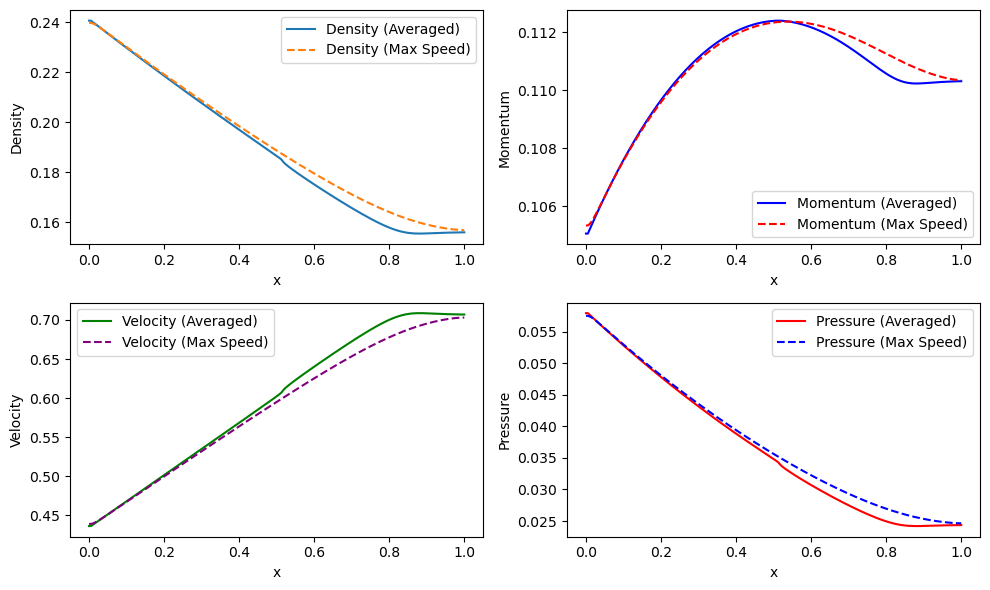

In [18]:
nx = 200
x = np.linspace(0, 1, nx)
dx = x[1] - x[0]

# Initial conditions:
# For x < 0.5: rho = 1.0, u = -1.0 (momentum = -1.0)
# For x >= 0.5: rho = 0.25, u = 1.0 (momentum = 0.25)
rho = np.ones(nx) * 0.25
momentum = np.ones(nx) * 0.25
rho[: nx // 2] = 1.0
momentum[: nx // 2] = -1.0

cfl = 0.5
t_final = 2
t = 0.0

# Create separate copies for each method
rho_avg, mom_avg = rho.copy(), momentum.copy()  # For averaged procedure
rho_max, mom_max = rho.copy(), momentum.copy()  # For max wave speed

while t < t_final:
    # Compute dt based on averaged solution
    u_avg = mom_avg / rho_avg
    c_avg = sound_speed(rho_avg)
    max_wave_speed_avg = np.max(np.abs(u_avg) + c_avg)
    dt_avg = cfl * dx / (max_wave_speed_avg + 1e-14)

    # Ensure we don't overshoot the final time
    dt = min(dt_avg, t_final - t)

    # Update the solution
    rho_avg, mom_avg = HLL_scheme(
        rho_avg, mom_avg, dx, dt, nt=1, use_max_wave_speed=False
    )
    rho_max, mom_max = HLL_scheme(
        rho_max, mom_max, dx, dt, nt=1, use_max_wave_speed=True
    )

    t += dt

# Compute derived quantities
u_avg = mom_avg / rho_avg
p_avg = pressure(rho_avg)

u_max = mom_max / rho_max
p_max = pressure(rho_max)

# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.plot(x, rho_avg, label="Density (Averaged)")
plt.plot(x, rho_max, label="Density (Max Speed)", linestyle="--")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x, mom_avg, label="Momentum (Averaged)", color="blue")
plt.plot(x, mom_max, label="Momentum (Max Speed)", linestyle="--", color="red")
plt.xlabel("x")
plt.ylabel("Momentum")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x, u_avg, label="Velocity (Averaged)", color="green")
plt.plot(x, u_max, label="Velocity (Max Speed)", linestyle="--", color="purple")
plt.xlabel("x")
plt.ylabel("Velocity")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x, p_avg, label="Pressure (Averaged)", color="red")
plt.plot(x, p_max, label="Pressure (Max Speed)", linestyle="--", color="blue")
plt.xlabel("x")
plt.ylabel("Pressure")
plt.legend()

plt.tight_layout()
plt.show()